In [1]:
import numpy as np
import pandas as pd
import requests
import json

/usr/local/var/pyenv/versions/pydata/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


[Swarmplot Documentation](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

A swarmplot is essentially a scatterplot without overlapping marks

[Formula 1 Data via Ergast](http://ergast.com/mrd/)

API access to Formula 1 data used for this example 

In [62]:
# Ergast F1 Data URL format:
# https://ergast.com/api/<series>/<season>/<round>/..

# <series> = 'f1'
# <season> = 4 digit integer
# <round> = 1 or 2 digit integer // optional

# Default response is XML. Append .json to get .JSON response
# Results limited by 'limit'. Max 1000, Default 30

# Browsing pitstop data
# Pitstop URL format: http://ergast.com/api/f1/2011/5/pitstops

# Test API call 
baseurl = 'http://ergast.com/api/f1/'
year = 2019
race = 21 #20 rounds in 2019

pitstop_url = baseurl + str(year) +'/'+ str(race) + '/pitstops.json'

print(pitstop_url)

# requests documentation: https://requests.readthedocs.io/en/master/user/quickstart/

response = requests.get(pitstop_url)
print(response.status_code)

# browse data using json.dumps for formatting
pit_data = response.json()

print(json.dumps(pit_data, sort_keys=True, indent=4))

http://ergast.com/api/f1/2019/21/pitstops.json
200
{
    "MRData": {
        "RaceTable": {
            "Races": [
                {
                    "Circuit": {
                        "Location": {
                            "country": "UAE",
                            "lat": "24.4672",
                            "locality": "Abu Dhabi",
                            "long": "54.6031"
                        },
                        "circuitId": "yas_marina",
                        "circuitName": "Yas Marina Circuit",
                        "url": "http://en.wikipedia.org/wiki/Yas_Marina_Circuit"
                    },
                    "PitStops": [
                        {
                            "driverId": "stroll",
                            "duration": "28.842",
                            "lap": "5",
                            "stop": "1",
                            "time": "17:22:34"
                        },
                        {
                     

In [63]:
# Looking at PitStops raw data
pitstops = pit_data['MRData']['RaceTable']['Races'][0]['PitStops']

print(pitstops)

[{'driverId': 'stroll', 'lap': '5', 'stop': '1', 'time': '17:22:34', 'duration': '28.842'}, {'driverId': 'norris', 'lap': '8', 'stop': '1', 'time': '17:27:40', 'duration': '22.974'}, {'driverId': 'giovinazzi', 'lap': '8', 'stop': '1', 'time': '17:27:52', 'duration': '21.977'}, {'driverId': 'ricciardo', 'lap': '11', 'stop': '1', 'time': '17:32:58', 'duration': '21.904'}, {'driverId': 'leclerc', 'lap': '12', 'stop': '1', 'time': '17:34:14', 'duration': '21.697'}, {'driverId': 'vettel', 'lap': '12', 'stop': '1', 'time': '17:34:22', 'duration': '25.771'}, {'driverId': 'sainz', 'lap': '12', 'stop': '1', 'time': '17:34:43', 'duration': '21.928'}, {'driverId': 'albon', 'lap': '13', 'stop': '1', 'time': '17:36:11', 'duration': '22.028'}, {'driverId': 'hulkenberg', 'lap': '18', 'stop': '1', 'time': '17:45:13', 'duration': '21.578'}, {'driverId': 'grosjean', 'lap': '18', 'stop': '1', 'time': '17:45:37', 'duration': '21.968'}, {'driverId': 'kevin_magnussen', 'lap': '20', 'stop': '1', 'time': '17:

In [76]:
# Creating pitstops dataframe

# 21 races in 2019 https://www.formula1.com/en/racing/2019.html
# loop through all rounds/races and create dataframe

baseurl = 'http://ergast.com/api/f1/'
year = 2019

df_pitstops = pd.DataFrame()

for i in range(21):    
    race = i + 1
    
    #Create URL
    pitstop_url = baseurl + str(year) +'/'+ str(race) + '/pitstops.json'

    response = requests.get(pitstop_url)
    pit_data = response.json()

    pitstops = pit_data['MRData']['RaceTable']['Races'][0]['PitStops']

    df = pd.DataFrame(pitstops)
    df['Round'] = race
    df['circuitId'] = pit_data['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId']
    
    df_pitstops = pd.concat([df_pitstops, df])

df_pitstops = df_pitstops.convert_dtypes()
#auto-convert turns 'duration' to string and we want float
df_pitstops['duration'] = pd.to_numeric(df_pitstops['duration'])

print(df_pitstops.dtypes)
print(df_pitstops)

driverId      string
lap           string
stop          string
time          string
duration     float64
Round          Int64
circuitId     string
dtype: object
      driverId lap stop      time  duration  Round    circuitId
0       kubica   1    1  16:15:28    32.997      1  albert_park
1    ricciardo   1    1  16:15:30    33.027      1  albert_park
2    raikkonen  12    1  16:31:50    23.299      1  albert_park
3   hulkenberg  13    1  16:33:19    21.588      1  albert_park
4        perez  13    1  16:33:28    23.234      1  albert_park
..         ...  ..  ...       ...       ...    ...          ...
20     leclerc  38    2  18:19:14    21.274     21   yas_marina
21      vettel  38    2  18:19:36    21.858     21   yas_marina
22       kvyat  40    1  18:23:38    21.496     21   yas_marina
23       sainz  41    2  18:25:36    21.466     21   yas_marina
24   ricciardo  42    2  18:27:24    21.624     21   yas_marina

[559 rows x 7 columns]


In [74]:
#Convert duration to numeric

print(df_pitstops.dtypes)

driverId      string
lap           string
stop          string
time          string
duration     float64
Round          Int64
CircuitId     string
dtype: object


In [9]:
#Browsing data
#Race results include the association of driver, race, and constructor that we want for reporting
        
#Race results: http://ergast.com/mrd/methods/results/
#Test API call 
results_base = 'http://ergast.com/api/f1/'
year = 2019
race = 1

results_url = results_base + str(year) +'/'+str(race)+'/results.json'

print(results_url)

#requests documentation: https://requests.readthedocs.io/en/master/user/quickstart/

response = requests.get(results_url)
print(response.status_code)

#browse data using json.dumps for formatting
results_data = response.json()

print(json.dumps(results_data, sort_keys=True, indent=4))

http://ergast.com/api/f1/2019/1/results.json
200
{
    "MRData": {
        "RaceTable": {
            "Races": [
                {
                    "Circuit": {
                        "Location": {
                            "country": "Australia",
                            "lat": "-37.8497",
                            "locality": "Melbourne",
                            "long": "144.968"
                        },
                        "circuitId": "albert_park",
                        "circuitName": "Albert Park Grand Prix Circuit",
                        "url": "http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit"
                    },
                    "Results": [
                        {
                            "Constructor": {
                                "constructorId": "mercedes",
                                "name": "Mercedes",
                                "nationality": "German",
                                "url": "http://en.wikipedia.

In [71]:
# Creating drivers/constructors dataframe 
# Dataset has more data for future use

results_base = 'http://ergast.com/api/f1/'
year = 2019

df_drivers_constructors = pd.DataFrame()


#21 races in 2019
for i in range(21):    
    race = i + 1
    
    #Create URL for race results
    results_url = results_base + str(year) +'/'+str(race)+'/results.json'

    response = requests.get(results_url)
    results_data = response.json()
    
    results = results_data['MRData']['RaceTable']['Races'][0]['Results']

    

    #Flatten ragged nested dictionaries
    for i in results:
        #list to hold flattened dictionary keys/values
        templist = []
        
        #dict to hold kvps
        temp = dict()


        temp['driverNumber'] = i['number']
        temp['resultPosition'] = i['position']
        temp['resultPoints'] = i['points']
        temp['driverId'] = i['Driver']['driverId']
        temp['constructorId'] = i['Constructor']['constructorId']
        temp['gridPosition'] = i['grid']
        temp['raceLaps'] = i['laps']
        temp['resultStatus'] = i['status'] 

        temp['circuitId'] = results_data['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId']
        temp['Round'] = race

        templist.append(temp)

        tempdf = pd.DataFrame(templist)
    
        df_drivers_constructors = pd.concat([df_drivers_constructors, tempdf])

#auto-convert datatypes
df_drivers_constructors = df_drivers_constructors.convert_dtypes()

print(df_drivers_constructors.dtypes)
print(df_drivers_constructors)

driverNumber      string
resultPosition    string
resultPoints      string
driverId          string
constructorId     string
gridPosition      string
raceLaps          string
resultStatus      string
circuitId         string
Round              Int64
dtype: object
   driverNumber resultPosition resultPoints        driverId constructorId  \
0            77              1           26          bottas      mercedes   
0            44              2           18        hamilton      mercedes   
0            33              3           15  max_verstappen      red_bull   
0             5              4           12          vettel       ferrari   
0            16              5           10         leclerc       ferrari   
..          ...            ...          ...             ...           ...   
0            99             16            0      giovinazzi          alfa   
0            63             17            0         russell      williams   
0            10             18            0

In [82]:
# Join constructorId to pitstops data 

df_drivers_lookup = df_drivers_constructors[['driverId', 'Round', 'circuitId', 'constructorId']]

joined_df = pd.merge(df_pitstops, df_drivers_lookup, on=['driverId', 'Round', 'circuitId'])

print(joined_df)


      driverId lap stop      time  duration  Round    circuitId constructorId
0       kubica   1    1  16:15:28    32.997      1  albert_park      williams
1       kubica  28    2  16:58:10    22.343      1  albert_park      williams
2       kubica  44    3  17:22:42    21.889      1  albert_park      williams
3    ricciardo   1    1  16:15:30    33.027      1  albert_park       renault
4    raikkonen  12    1  16:31:50    23.299      1  albert_park          alfa
..         ...  ..  ...       ...       ...    ...          ...           ...
554   hamilton  26    1  17:58:06    22.178     21   yas_marina      mercedes
555     bottas  29    1  18:04:02    21.145     21   yas_marina      mercedes
556    russell  32    1  18:10:43    22.272     21   yas_marina      williams
557      perez  37    1  18:18:24    22.230     21   yas_marina  racing_point
558      kvyat  40    1  18:23:38    21.496     21   yas_marina    toro_rosso

[559 rows x 8 columns]


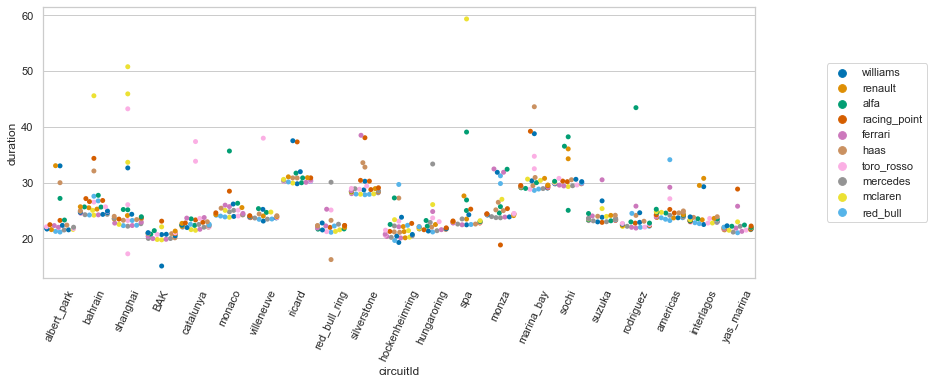

In [124]:
import seaborn as sns 
import matplotlib.pyplot as plt



fig_dims = (15,5)
fig, ax = plt.subplots(figsize = fig_dims)

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(style='whitegrid', palette='colorblind')

swarmplot = sns.swarmplot(x='circuitId', y='duration', hue='constructorId', ax = ax, data=joined_df)

swarmplot.set_xticklabels(swarmplot.get_xticklabels(), rotation=65, horizontalalignment='center')

#move legends manually (https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

box = swarmplot.get_position()
swarmplot.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
swarmplot.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)


plt.show()

In [93]:
print(joined_df[joined_df['Round']==20].sort_values(by=['duration']))

            driverId lap stop      time  duration  Round   circuitId  \
521          russell  23    1  14:42:37    22.500     20  interlagos   
515   max_verstappen  44    2  15:07:03    22.657     20  interlagos   
519            kvyat  23    1  14:42:08    22.759     20  interlagos   
533            sainz  29    1  14:49:33    22.770     20  interlagos   
514   max_verstappen  21    1  14:38:49    22.818     20  interlagos   
508         hamilton  20    1  14:37:36    22.882     20  interlagos   
517            gasly  22    1  14:40:34    22.922     20  interlagos   
532          leclerc  29    1  14:49:09    22.966     20  interlagos   
523           vettel  25    1  14:43:54    23.039     20  interlagos   
522            albon  24    1  14:42:52    23.073     20  interlagos   
506            perez  17    1  14:34:32    23.079     20  interlagos   
509         hamilton  43    2  15:05:54    23.088     20  interlagos   
507            perez  45    2  15:09:29    23.142     20  interl

In [6]:
#Driver data currently not used
#Driver Data: http://ergast.com/mrd/methods/drivers/
#Test API call 
driver_base = 'http://ergast.com/api/f1/'
year = 2019

drivers_url = driver_base + str(year) +'/constructors.json'

print(drivers_url)

#requests documentation: https://requests.readthedocs.io/en/master/user/quickstart/
response = requests.get(drivers_url)
print(response.status_code)

#browse data using json.dumps for formatting
drivers_data = response.json()

print(json.dumps(drivers_data, sort_keys=True, indent=4))

http://ergast.com/api/f1/2019/constructors.json
200
{
    "MRData": {
        "ConstructorTable": {
            "Constructors": [
                {
                    "constructorId": "alfa",
                    "name": "Alfa Romeo",
                    "nationality": "Italian",
                    "url": "http://en.wikipedia.org/wiki/Alfa_Romeo_in_Formula_One"
                },
                {
                    "constructorId": "ferrari",
                    "name": "Ferrari",
                    "nationality": "Italian",
                    "url": "http://en.wikipedia.org/wiki/Scuderia_Ferrari"
                },
                {
                    "constructorId": "haas",
                    "name": "Haas F1 Team",
                    "nationality": "American",
                    "url": "http://en.wikipedia.org/wiki/Haas_F1_Team"
                },
                {
                    "constructorId": "mclaren",
                    "name": "McLaren",
                    "n